#        Machine Learning Assignment2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Titanic Dataset.xlsx')

In [3]:
data.shape

(891, 12)

# Q1: EDA

Analyze the columns Sex and Survived. People who did not survive are
more likely to be of which sex?
Analyze the columns Pclass and Survived. People who did not survive are
more likely to be of which class?
Use count plots, histograms, boxplots etc.


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

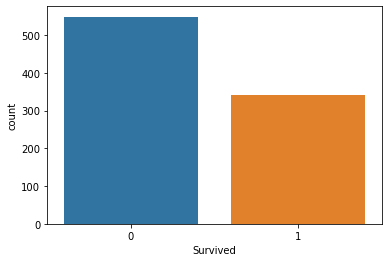

In [6]:
sns.countplot(x = 'Survived', data = data)
plt.show()

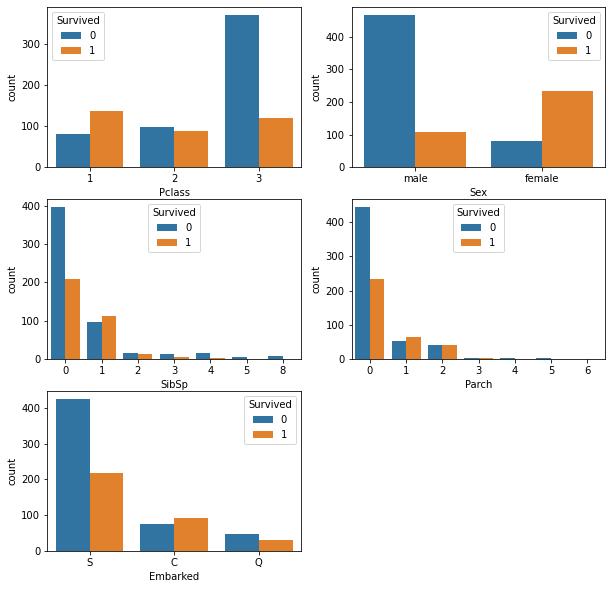

In [7]:
plt.figure( figsize = (10,10 ))
cols = ['Pclass','Sex','SibSp','Parch','Embarked']

for i in range(1,6):
    plt.subplot(3,2,i)
    sns.countplot(data[cols[i-1]],hue =  data['Survived'])


In [8]:
# Survival rate by sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
# Survival rate by sex and class
data.pivot_table('Survived',index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Figure size 576x576 with 0 Axes>

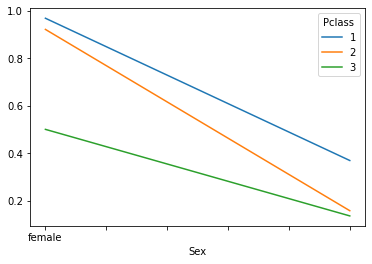

In [10]:
plt.figure(figsize = (8,8))
data.pivot_table('Survived',index = 'Sex', columns = 'Pclass').plot()

In [11]:
age = pd.cut(data['Age'], [0,18,80])
data.pivot_table('Survived', ['Sex',age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

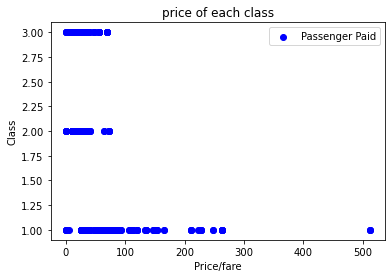

In [12]:
# Price paid for each class

plt.scatter(data['Fare'], data['Pclass'], color = 'blue',label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/fare')
plt.title('price of each class')
plt.legend()
plt.show()

# Missing Data handling

Which features have missing data and how can they be handled?  
Hint: Check average age by passenger class. You can use the average age
based on the pclass to fill in the missing data?


In [13]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


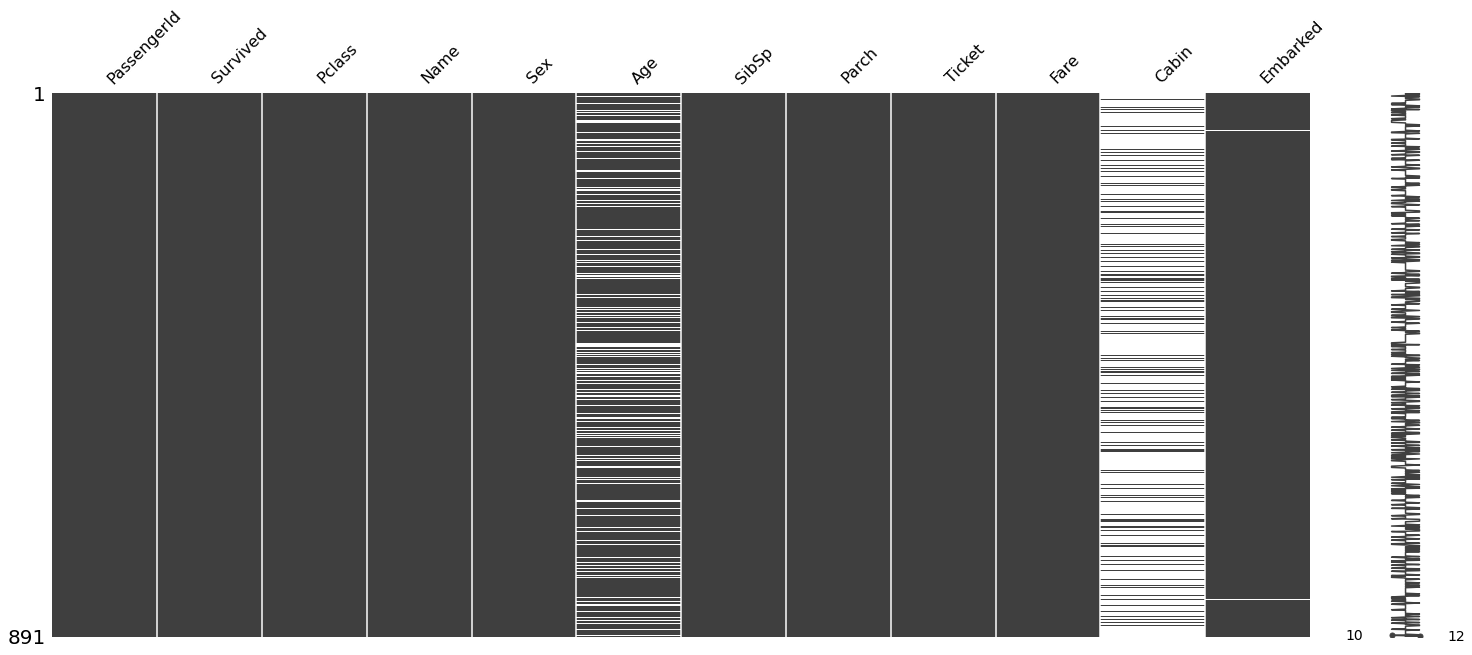

In [14]:
import missingno as msno
msno.matrix(data)
plt.show()

In [15]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Average Age

data["Age"].mean()

29.69911764705882

In [17]:
# Replace missing age with average age

data['Age'] = data['Age'].replace(np.NaN, 30)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Droping cabin colum as it has many missing values

data1 = data.drop(['Cabin'] , axis = 1)


In [20]:
data1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
data1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
# eplacing missing value with P in Embarked feature
data1['Embarked'] = data1['Embarked'].replace(np.NaN, 'P')

In [23]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
data1.shape

(891, 11)

**Ticket column represents ticket number and it does not seems relevant to survival of passengers, it can be dropped.  
Other than that name and PassengerId.**

In [25]:
data2 = data1.drop(['Name','Ticket','PassengerId'] , axis = 1)


In [26]:
data2.shape

(891, 8)

In [27]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
# Encode Sex column
data2.iloc[:,2] = le.fit_transform(data2.iloc[:,2])

In [30]:
# Encode Embarked column
data2.iloc[:,7] = le.fit_transform(data2.iloc[:,7])

In [31]:
print(data2['Sex'].unique())
print(data2['Embarked'].unique())

[1 0]
[3 0 2 1]


In [32]:
data2.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [33]:
x = data2.iloc[:,1:8].values
y = data2.iloc[:,0].values

In [34]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [35]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [36]:
# creating function with different models

def models(x_train, y_train):
    
    # Logistic
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state = 0)
    lr.fit(x_train, y_train)
    
    # KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(x_train, y_train)
    
    # SVC(Linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)
    
    # SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)
    
    # Gaussian
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)
    
    # DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt.fit(x_train, y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    
    # Training Accuracy
    print('[0] Logistic Regression Training Accuracy: ', lr.score(x_train,y_train))
    print('[1] KNeighbors Training Accuracy: ', knn.score(x_train,y_train))
    print('[2] SVC(linear kernel) Training Accuracy: ', svc_lin.score(x_train,y_train))
    print('[3] SVC(RBF kernel) Training Accuracy: ', svc_rbf.score(x_train,y_train))
    print('[4] Gaussian Training Accuracy: ', gauss.score(x_train,y_train))
    print('[5] DecisionTree Training Accuracy: ', dt.score(x_train,y_train))
    print('[6] Random Forest Training Accuracy: ', rf.score(x_train,y_train))
    
    return lr, knn, svc_lin, svc_rbf, gauss, dt, rf

In [37]:
# Get the train all models

model = models(x_train, y_train)

[0] Logistic Regression Training Accuracy:  0.7991573033707865
[1] KNeighbors Training Accuracy:  0.8721910112359551
[2] SVC(linear kernel) Training Accuracy:  0.7865168539325843
[3] SVC(RBF kernel) Training Accuracy:  0.8412921348314607
[4] Gaussian Training Accuracy:  0.7879213483146067
[5] DecisionTree Training Accuracy:  0.9789325842696629
[6] Random Forest Training Accuracy:  0.9789325842696629


In [38]:
# Confusion matrices and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test,model[i].predict(x_test)).ravel()
    
    # Extract TN FP FN TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    
    test_score = (TP+TN)/(TP+TN+FP+FN)
    print(cm)
    print('Model[{}] Testing Accurcy = "{}"'.format(i, test_score))
    print()

[95 15 19 50]
Model[0] Testing Accurcy = "0.8100558659217877"

[97 13 23 46]
Model[1] Testing Accurcy = "0.7988826815642458"

[92 18 20 49]
Model[2] Testing Accurcy = "0.7877094972067039"

[98 12 22 47]
Model[3] Testing Accurcy = "0.8100558659217877"

[89 21 15 54]
Model[4] Testing Accurcy = "0.7988826815642458"

[82 28 24 45]
Model[5] Testing Accurcy = "0.7094972067039106"

[99 11 20 49]
Model[6] Testing Accurcy = "0.8268156424581006"



In [52]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame({'Feature':data2.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
#importance = importance.sort_values('importance', ascending = False).set_index('feature')
importances

,Feature,importance
0,Pclass,0.085
1,Sex,0.258
2,Age,0.265
3,SibSp,0.050
4,Parch,0.038
5,Fare,0.271
6,Embarked,0.033


<BarContainer object of 7 artists>

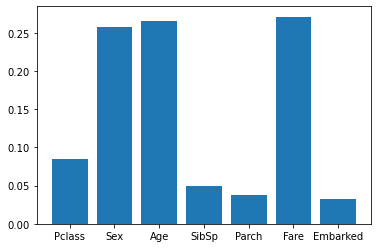

In [60]:
plt.bar(importances['Feature'], importances['importance'])


In [ ]:

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32

In [76]:
survival = [[1,0,20,0,0,50,1]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
survival_scaled = sc.fit_transform(survival)
prediction = model[6].predict(survival_scaled)
print(prediction)
if prediction == 0:
    print('Oh no! you did not make it')
else:
    print('Nice! you will survive')

[0]
Oh no! you did not make it
